# Perceptron Attempt

I'm going to take $d = 2$ for ease of visualisation, and I'll start with creating a random line for a target function $f$ and random points in the plane as my data set $\mathcal{D}$

$f$ will be controlled by two random weights $\mathbf{w} = [w_1, w_1]$ and a random threshold $b$, and defined by
$$f(\mathbf{x}) = \text{sign}(w_1 x_1 + w_2 x_2 + b)$$


In [45]:
import numpy as np
w_true = np.random.uniform(-1, 1, size=3) # w_0 = b

def target_function(x):
    return np.sign(np.dot(w_true, x)) # x[0] = 1 => w_0 * x_0 = threshold

Next I'll make my training data $\mathcal{D}$ as 20 points on the line, using the target function. This will be structured as
$$\mathcal{D} = \{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_N, y_N)\},$$

where in this case $N = 20$

In [46]:
N = 20 # number of points
X_train_raw = np.random.uniform(-1, 1, size=(N, 2))
X_train = np.hstack((np.ones((N, 1)), X_train_raw))

y_train = np.array([target_function(x) for x in X_train])
D = list(zip(X_train, y_train))

Next, I will implement the perceptron learning algorithm on $\mathcal{D}$ using and iterative method over $t = 0, 1, 2, \ldots$, picking out misclassified examples as $(\mathbf{x}(t), y(t))$ and using it to update $\mathbf{w}(t)$ with the update rule
$$\mathbf{w}(t+1) = \mathbf{w}(t) + y(t)\mathbf{x}(t)$$


In [47]:
w = np.zeros(3) # initialise as zero vector
t = 0
def h(x):
    return 1 if np.dot(w, x) >= 0 else -1
while True:
    misclassified = [(x, y) for x, y in D if h(x) != y]
    if not misclassified:
        break
    x_t, y_t = misclassified[0]
    w += y_t * x_t
    t += 1

In order to see the results of the perceptron, I'll draw out the target function, the data set and the hypothesis $g$

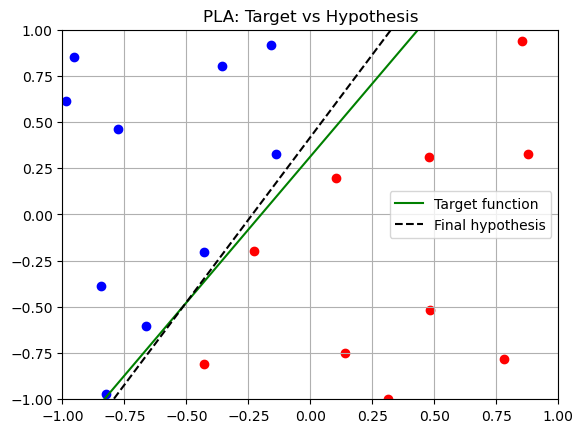

In [ ]:
import matplotlib.pyplot as plt

# plot training points (skipping x[0] = 1)
for x, y in D:
    plt.scatter(x[1], x[2], color='blue' if y == 1 else 'red')

# target function line
x_vals = np.linspace(-1, 1, 100) # generate points in range for line segment
if w_true[2] != 0:
    y_target = -(w_true[0] + w_true[1] * x_vals) / w_true[2] # <=> w_0 + w_1 x + w_2 y = 0
    plt.plot(x_vals, y_target, 'g-', label='Target function')

# final hypothesis line
if w[2] != 0:
    y_hyp = -(w[0] + w[1] * x_vals) / w[2] # <=> w_0 + w_1 x + w_2 y = 0
    plt.plot(x_vals, y_hyp, 'k--', label='Final hypothesis')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)
plt.title("PLA: Target vs Hypothesis")
plt.show()
